# <font color ='red'>Brazilian E-Commerce Public Dataset by Olist</font>
February, 2022.

Author: [
Sébastien Lozano-Forero](https://www.linkedin.com/in/sebastienlozanoforero/)

In [69]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from pandas_profiling import ProfileReport

from datashader.utils import lnglat_to_meters as webm
from IPython.display import Image
from IPython.core.display import HTML 
# from mpl_toolkits.basemap import Basemap

%matplotlib inline
sns.set(rc = {'figure.figsize':(15,8)})

## General Overview

The project involves information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil and gathered by Olist, the largest department store in Brazilian marketplaces. Olist connects small businesses from all over Brazil to channels without hassle and with a single contract. Those merchants are able to sell their products through the Olist Store and ship them directly to the customers using Olist logistics partners. 

This is a Kaggle public dataset. The entire presentation can be found [here](https://www.kaggle.com/olistbr/brazilian-ecommerce). 



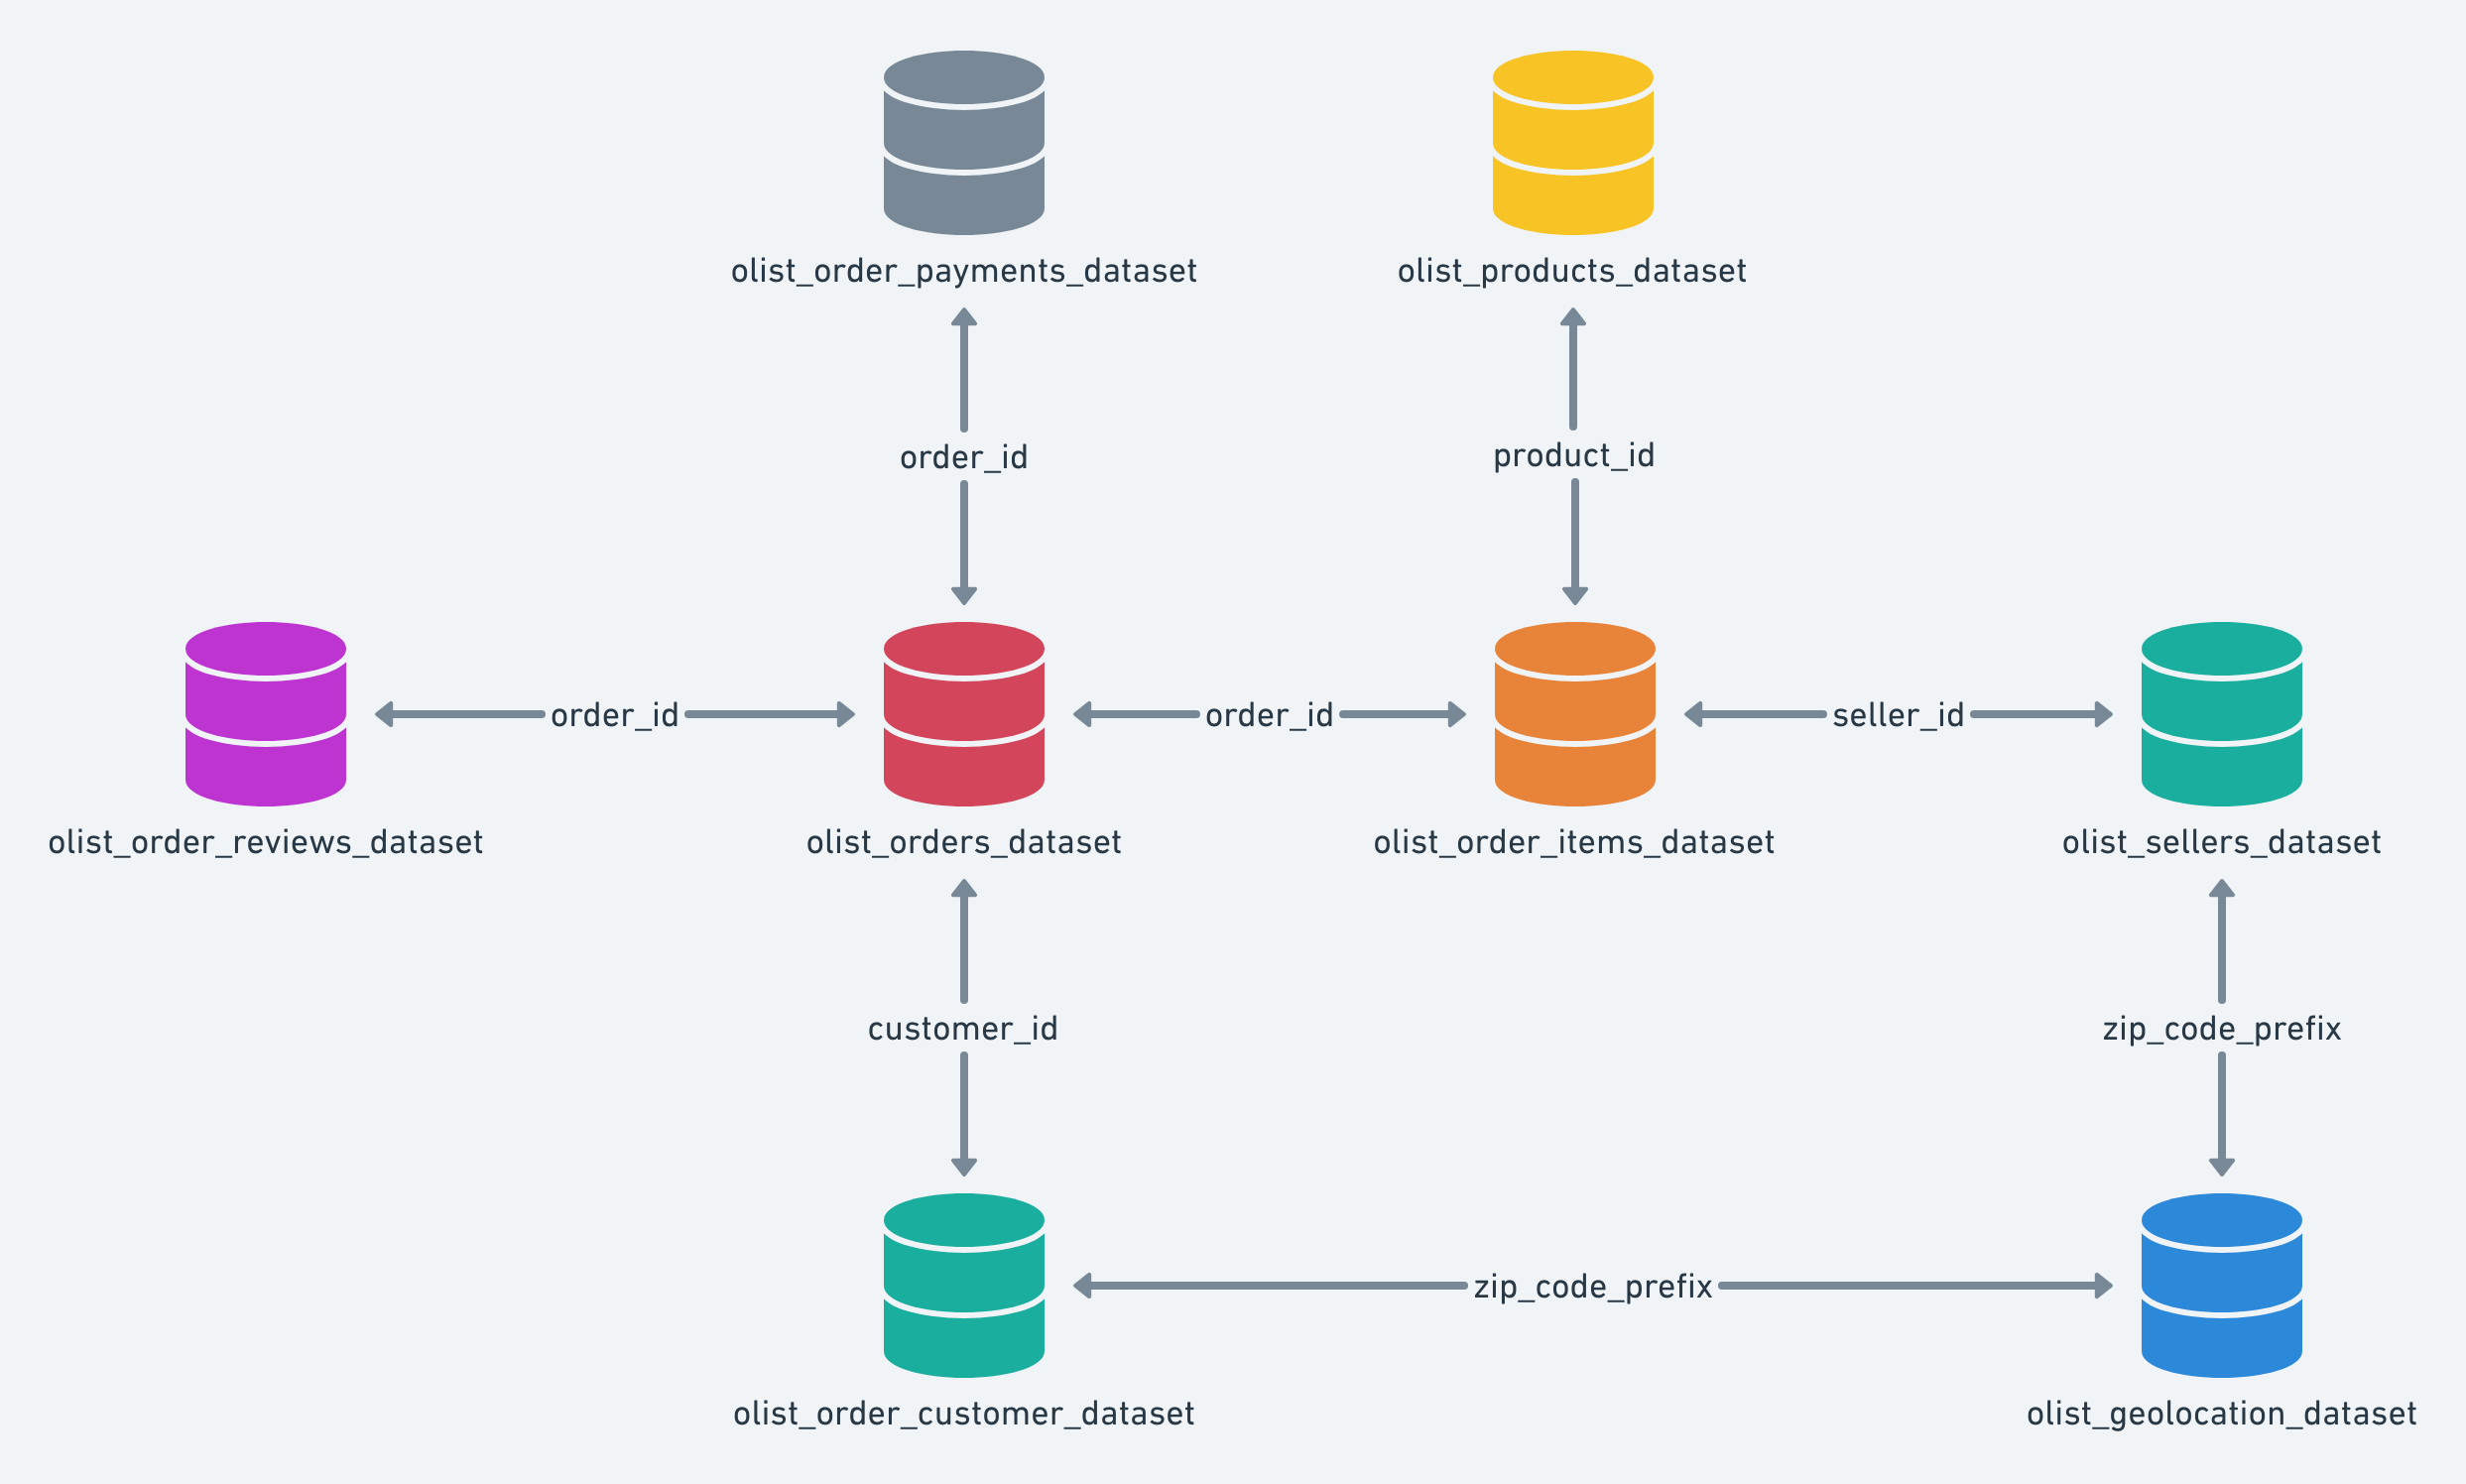

In [2]:
Image(filename ="img/scheme.png", width=500, height=500, unconfined=True)

Some ideas of projects for this problem are provided in the dataset description

#### NLP:

This dataset offers a supreme environment to parse out the reviews text through its multiple dimensions.

#### Clustering:

Some customers didn't write a review. But why are they happy or mad?

#### Sales Prediction:

With purchase date information you'll be able to predict future sales.

#### Delivery Performance:

You will also be able to work through delivery performance and find ways to optimize delivery times.

#### Product Quality:

Enjoy yourself discovering the products categories that are more prone to customer insatisfaction.

#### Feature Engineering:

Create features from this rich dataset or attach some external public information to it.

# Step 01 - Data Description

## Data Loading

In [3]:
path = 'C:/Users/Windows/Desktop/Repos/Olist/data'
files = [f for f in os.listdir(path) if f.endswith(".csv")]
print(files)

['olist_customers_dataset.csv', 'olist_geolocation_dataset.csv', 'olist_orders_dataset.csv', 'olist_order_items_dataset.csv', 'olist_order_payments_dataset.csv', 'olist_order_reviews_dataset.csv', 'olist_products_dataset.csv', 'olist_sellers_dataset.csv', 'product_category_name_translation.csv']


In [4]:
df_customer = pd.read_csv('data/olist_customers_dataset.csv')
df_geolocation = pd.read_csv('data/olist_geolocation_dataset.csv')
df_order_items = pd.read_csv('data/olist_order_items_dataset.csv')
df_order_payments = pd.read_csv('data/olist_order_payments_dataset.csv')
df_order_reviews = pd.read_csv('data/olist_order_reviews_dataset.csv')
df_orders = pd.read_csv('data/olist_orders_dataset.csv')
df_products = pd.read_csv('data/olist_products_dataset.csv')
df_sellers = pd.read_csv('data/olist_sellers_dataset.csv')

## Customer table

This dataset has information about the customer and its location. Use it to identify unique customers in the orders dataset and to find the orders delivery location.

At our system each order is assigned to a unique customerid. This means that the same customer will get different ids for different orders. The purpose of having a customerunique_id on the dataset is to allow you to identify customers that made repurchases at the store. Otherwise you would find that each order had a different customer associated with.

In [5]:
df_customer.head().T

,0,1,2,3,4
customer_id,06b8999e2fba1a1fbc88172c00ba8bc7,18955e83d337fd6b2def6b18a428ac77,4e7b3e00288586ebd08712fdd0374a03,b2b6027bc5c5109e529d4dc6358b12c3,4f2d8ab171c80ec8364f7c12e35b23ad
customer_unique_id,861eff4711a542e4b93843c6dd7febb0,290c77bc529b7ac935b93aa66c333dc3,060e732b5b29e8181a18229c7b0b2b5e,259dac757896d24d7702b9acbbff3f3c,345ecd01c38d18a9036ed96c73b8d066
customer_zip_code_prefix,14409,9790,1151,8775,13056
customer_city,franca,sao bernardo do campo,sao paulo,mogi das cruzes,campinas
customer_state,SP,SP,SP,SP,SP


In [6]:
df_customer.shape

(99441, 5)

**df_customer** contains the following variables
- customer_id: key to the orders dataset. Each order has a unique customer_id.
- customer_unique_id: unique identifier of a customer.
- customer_zip_code_prefix: first five digits of customer zip code
- customer_city: customer city name
- customer_state: customer state

## Geolocation table

This dataset has information Brazilian zip codes and its lat/lng coordinates. Use it to plot maps and find distances between sellers and customers.

In [7]:
df_geolocation.head().T

,0,1,2,3,4
geolocation_zip_code_prefix,1037,1046,1046,1041,1035
geolocation_lat,-23.545621,-23.546081,-23.546129,-23.544392,-23.541578
geolocation_lng,-46.639292,-46.64482,-46.642951,-46.639499,-46.641607
geolocation_city,sao paulo,sao paulo,sao paulo,sao paulo,sao paulo
geolocation_state,SP,SP,SP,SP,SP


In [8]:
df_geolocation.shape

(1000163, 5)

**df_geolocation** contains the following variables
- geolocation_zip_code_prefix: first 5 digits of zip code
- geolocation_lat: Latitude 
- geolocation_lng: Longitue
- geolocation_city: City name
- geolocation_state: State name

## Orders table
This dataset includes data about the items purchased within each order.

In [9]:
df_order_items.head().T

,0,1,2,3,4
order_id,00010242fe8c5a6d1ba2dd792cb16214,00018f77f2f0320c557190d7a144bdd3,000229ec398224ef6ca0657da4fc703e,00024acbcdf0a6daa1e931b038114c75,00042b26cf59d7ce69dfabb4e55b4fd9
order_item_id,1,1,1,1,1
product_id,4244733e06e7ecb4970a6e2683c13e61,e5f2d52b802189ee658865ca93d83a8f,c777355d18b72b67abbeef9df44fd0fd,7634da152a4610f1595efa32f14722fc,ac6c3623068f30de03045865e4e10089
seller_id,48436dade18ac8b2bce089ec2a041202,dd7ddc04e1b6c2c614352b383efe2d36,5b51032eddd242adc84c38acab88f23d,9d7a1d34a5052409006425275ba1c2b4,df560393f3a51e74553ab94004ba5c87
shipping_limit_date,2017-09-19 09:45:35,2017-05-03 11:05:13,2018-01-18 14:48:30,2018-08-15 10:10:18,2017-02-13 13:57:51
price,58.9,239.9,199.0,12.99,199.9
freight_value,13.29,19.93,17.87,12.79,18.14


In [10]:
df_order_items.shape

(112650, 7)

**df_order_items** contains the following variables
- order_id: order unique identifier
- order_item_id: sequential number identifying number of items included in the same order.
- product_id: product unique identifier
- seller_id: seller unique identifier
- shipping_limit_date: Shows the seller shipping limit date for handling the order over to the logistic partner.
- price: item price
- freight_value: item freight value item (if an order has more than one item the freight value is splitted between items)

## Payments table
This dataset includes data about the orders payment options

In [11]:
df_order_payments.head().T

,0,1,2,3,4
order_id,b81ef226f3fe1789b1e8b2acac839d17,a9810da82917af2d9aefd1278f1dcfa0,25e8ea4e93396b6fa0d3dd708e76c1bd,ba78997921bbcdc1373bb41e913ab953,42fdf880ba16b47b59251dd489d4441a
payment_sequential,1,1,1,1,1
payment_type,credit_card,credit_card,credit_card,credit_card,credit_card
payment_installments,8,1,1,8,2
payment_value,99.33,24.39,65.71,107.78,128.45


In [12]:
df_order_payments.shape

(103886, 5)

**df_order_payments** contains the following variables
- order_id: Uunique identifier of an order.
- payment_sequential: a customer may pay an order with more than one payment method. If he does so, a sequence will be created to
- payment_type: method of payment chosen by the customer.
- payment_installments: number of installments chosen by the customer.
- payment_value: transaction value.

## Order Reviews table

This dataset includes data about the reviews made by the customers.

After a customer purchases the product from Olist Store a seller gets notified to fulfill that order. Once the customer receives the product, or the estimated delivery date is due, the customer gets a satisfaction survey by email where he can give a note for the purchase experience and write down some comments.

In [13]:
df_order_reviews.head().T

,0,1,2,3,4
review_id,7bc2406110b926393aa56f80a40eba40,80e641a11e56f04c1ad469d5645fdfde,228ce5500dc1d8e020d8d1322874b6f0,e64fb393e7b32834bb789ff8bb30750e,f7c4243c7fe1938f181bec41a392bdeb
order_id,73fc7af87114b39712e6da79b0a377eb,a548910a1c6147796b98fdf73dbeba33,f9e4b658b201a9f2ecdecbb34bed034b,658677c97b385a9be170737859d3511b,8e6bfb81e283fa7e4f11123a3fb894f1
review_score,4,5,5,5,5
review_comment_title,NaN,NaN,NaN,NaN,NaN
review_comment_message,NaN,NaN,NaN,Recebi bem antes do prazo estipulado.,Parabéns lojas lannister adorei comprar pela I...
review_creation_date,2018-01-18 00:00:00,2018-03-10 00:00:00,2018-02-17 00:00:00,2017-04-21 00:00:00,2018-03-01 00:00:00
review_answer_timestamp,2018-01-18 21:46:59,2018-03-11 03:05:13,2018-02-18 14:36:24,2017-04-21 22:02:06,2018-03-02 10:26:53


In [14]:
df_order_reviews.shape

(99224, 7)

**df_order_reviews** contains the following variables
- review_id: unique review identifier
- order_id: unique order identifier
- review_score: Note ranging from 1 to 5 given by the customer on a satisfaction survey.
- review_comment_title: Comment title from the review left by the customer, in Portuguese.
- review_comment_message: Comment message from the review left by the customer, in Portuguese.
- review_creation_date: Shows the date in which the satisfaction survey was sent to the customer.
- review_answer_timestamp: Shows satisfaction survey answer timestamp.

## Order information table
This is the core dataset. From each order you might find all other information.

In [15]:
df_orders.head().T

,0,1,2,3,4
order_id,e481f51cbdc54678b7cc49136f2d6af7,53cdb2fc8bc7dce0b6741e2150273451,47770eb9100c2d0c44946d9cf07ec65d,949d5b44dbf5de918fe9c16f97b45f8a,ad21c59c0840e6cb83a9ceb5573f8159
customer_id,9ef432eb6251297304e76186b10a928d,b0830fb4747a6c6d20dea0b8c802d7ef,41ce2a54c0b03bf3443c3d931a367089,f88197465ea7920adcdbec7375364d82,8ab97904e6daea8866dbdbc4fb7aad2c
order_status,delivered,delivered,delivered,delivered,delivered
order_purchase_timestamp,2017-10-02 10:56:33,2018-07-24 20:41:37,2018-08-08 08:38:49,2017-11-18 19:28:06,2018-02-13 21:18:39
order_approved_at,2017-10-02 11:07:15,2018-07-26 03:24:27,2018-08-08 08:55:23,2017-11-18 19:45:59,2018-02-13 22:20:29
order_delivered_carrier_date,2017-10-04 19:55:00,2018-07-26 14:31:00,2018-08-08 13:50:00,2017-11-22 13:39:59,2018-02-14 19:46:34
order_delivered_customer_date,2017-10-10 21:25:13,2018-08-07 15:27:45,2018-08-17 18:06:29,2017-12-02 00:28:42,2018-02-16 18:17:02
order_estimated_delivery_date,2017-10-18 00:00:00,2018-08-13 00:00:00,2018-09-04 00:00:00,2017-12-15 00:00:00,2018-02-26 00:00:00


In [16]:
df_orders.shape

(99441, 8)

**df_orders** contains the following variables
- order_id: unique identifier of the order
- customer_id: key to the customer dataset. Each order has a unique customer_id
- order_status: Reference to the order status (delivered, shipped, etc)
- order_purchase_timestamp: Shows the purchase timestamp.
- order_approved_at: Shows the payment approval timestamp
- order_delivered_carrier_date: Shows the order posting timestamp. When it was handled to the logistic partner
- order_delivered_customer_date: Shows the actual order delivery date to the customer.
- order_estimated_delivery_date: Shows the estimated delivery date that was informed to customer at the purchase moment.

## Products information table
Shows the estimated delivery date that was informed to customer at the purchase moment.

In [17]:
df_products.head().T

,0,1,2,3,4
product_id,1e9e8ef04dbcff4541ed26657ea517e5,3aa071139cb16b67ca9e5dea641aaa2f,96bd76ec8810374ed1b65e291975717f,cef67bcfe19066a932b7673e239eb23d,9dc1a7de274444849c219cff195d0b71
product_category_name,perfumaria,artes,esporte_lazer,bebes,utilidades_domesticas
product_name_lenght,40.0,44.0,46.0,27.0,37.0
product_description_lenght,287.0,276.0,250.0,261.0,402.0
product_photos_qty,1.0,1.0,1.0,1.0,4.0
product_weight_g,225.0,1000.0,154.0,371.0,625.0
product_length_cm,16.0,30.0,18.0,26.0,20.0
product_height_cm,10.0,18.0,9.0,4.0,17.0
product_width_cm,14.0,20.0,15.0,26.0,13.0


In [18]:
df_products.shape

(32951, 9)

**df_products** contains the following variables
- product_id: unique product identifier
- product_category_name: root category of product, in Portuguese.
- product_name_lenght: number of characters extracted from the product name.
- product_description_lenght: number of characters extracted from the product description.
- product_photos_qty: number of product published photos
- product_weight_g: product weight measured in grams.
- product_length_cm: product length measured in centimeters.
- product_height_cm: product height measured in centimeters.
- product_width_cm: product width measured in centimeters.

## Sellers information table
This dataset includes data about the sellers that fulfilled orders made at Olist. Use it to find the seller location and to identify which seller fulfilled each product.

In [19]:
df_sellers.head().T

,0,1,2,3,4
seller_id,3442f8959a84dea7ee197c632cb2df15,d1b65fc7debc3361ea86b5f14c68d2e2,ce3ad9de960102d0677a81f5d0bb7b2d,c0f3eea2e14555b6faeea3dd58c1b1c3,51a04a8a6bdcb23deccc82b0b80742cf
seller_zip_code_prefix,13023,13844,20031,4195,12914
seller_city,campinas,mogi guacu,rio de janeiro,sao paulo,braganca paulista
seller_state,SP,SP,RJ,SP,SP


In [20]:
df_sellers.shape

(3095, 4)

**df_products** contains the following variables: 
- seller_id: seller unique identifier
- seller_zip_code_prefix: first 5 digits of seller zip code
- seller_city: seller city name
- seller_state: seller state

# Step 02 - Feature Engineering

Merging all datasets into one big structure containing all information of the previous tables would be the preferred approach. 

In [21]:
olist = df_orders.merge(df_order_items, on='order_id', how='left')
olist = olist.merge(df_order_payments, on='order_id', how='outer', validate='m:m')
olist = olist.merge(df_order_reviews, on='order_id', how='outer')
olist = olist.merge(df_products, on='product_id', how='outer')
olist = olist.merge(df_customer, on='customer_id', how='outer')
olist = olist.merge(df_sellers, on='seller_id', how='outer')

In [22]:
olist.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'seller_zip_code_prefix', 'seller_city',
       'seller_state'],
      dtype='object')

In [23]:
olist.head().T

,0,1,2,3,4
order_id,e481f51cbdc54678b7cc49136f2d6af7,e481f51cbdc54678b7cc49136f2d6af7,e481f51cbdc54678b7cc49136f2d6af7,128e10d95713541c87cd1a2e48201934,0e7e841ddf8f8f2de2bad69267ecfbcf
customer_id,9ef432eb6251297304e76186b10a928d,9ef432eb6251297304e76186b10a928d,9ef432eb6251297304e76186b10a928d,a20e8105f23924cd00833fd87daa0831,26c7ac168e1433912a51b924fbd34d34
order_status,delivered,delivered,delivered,delivered,delivered
order_purchase_timestamp,2017-10-02 10:56:33,2017-10-02 10:56:33,2017-10-02 10:56:33,2017-08-15 18:29:31,2017-08-02 18:24:47
order_approved_at,2017-10-02 11:07:15,2017-10-02 11:07:15,2017-10-02 11:07:15,2017-08-15 20:05:16,2017-08-02 18:43:15
order_delivered_carrier_date,2017-10-04 19:55:00,2017-10-04 19:55:00,2017-10-04 19:55:00,2017-08-17 15:28:33,2017-08-04 17:35:43
order_delivered_customer_date,2017-10-10 21:25:13,2017-10-10 21:25:13,2017-10-10 21:25:13,2017-08-18 14:44:43,2017-08-07 18:30:01
order_estimated_delivery_date,2017-10-18 00:00:00,2017-10-18 00:00:00,2017-10-18 00:00:00,2017-08-28 00:00:00,2017-08-15 00:00:00
order_item_id,1.0,1.0,1.0,1.0,1.0
product_id,87285b34884572647811a353c7ac498a,87285b34884572647811a353c7ac498a,87285b34884572647811a353c7ac498a,87285b34884572647811a353c7ac498a,87285b34884572647811a353c7ac498a


In [24]:
olist['review_comment_title'] = olist['review_comment_title'].fillna('No title')
olist['review_comment_message'] = olist['review_comment_message'].fillna('No message')

<AxesSubplot:>

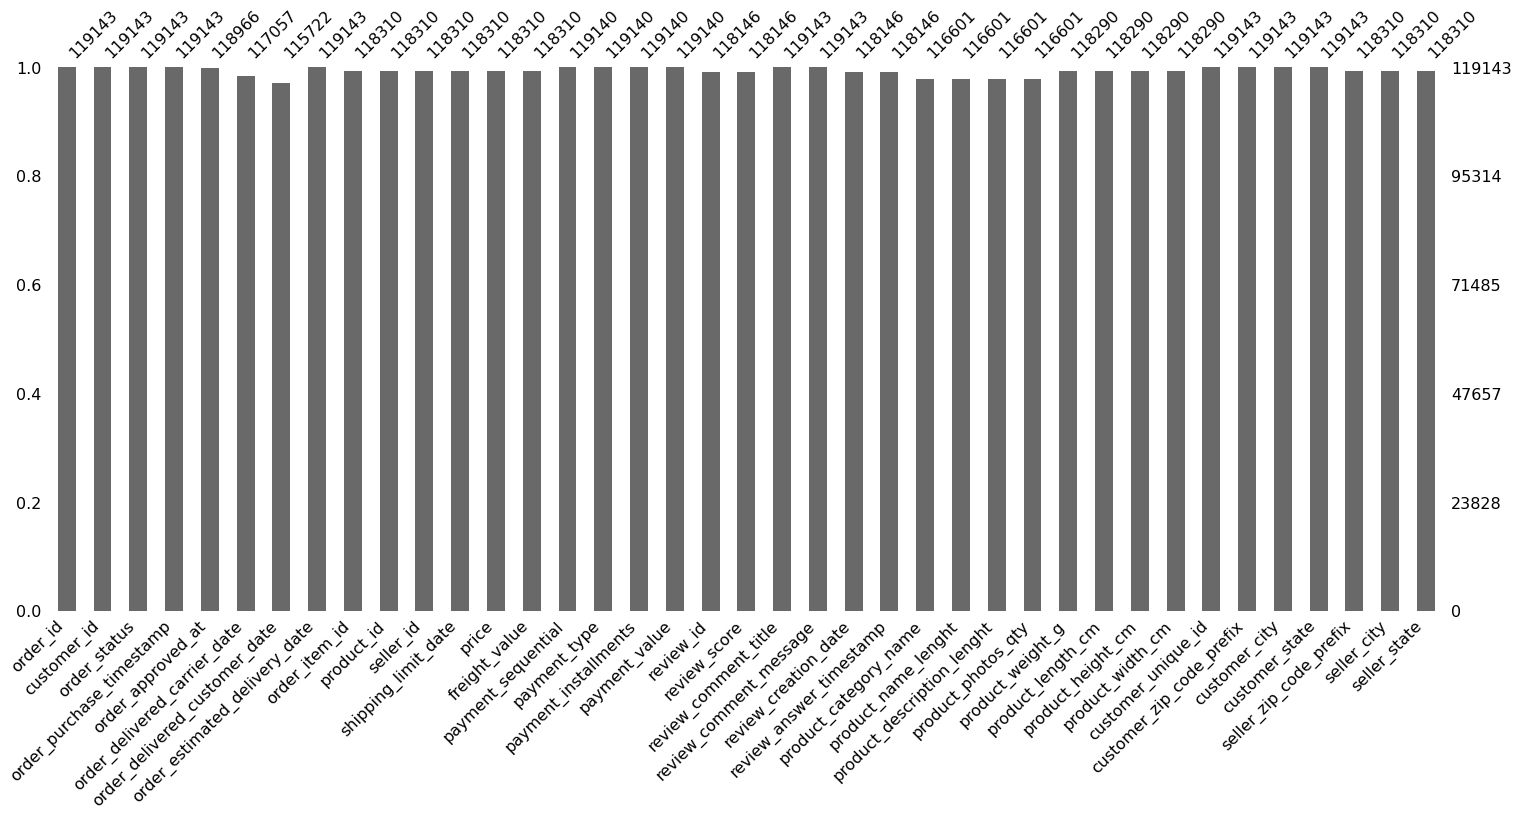

In [25]:
msno.bar(olist)

<AxesSubplot:>

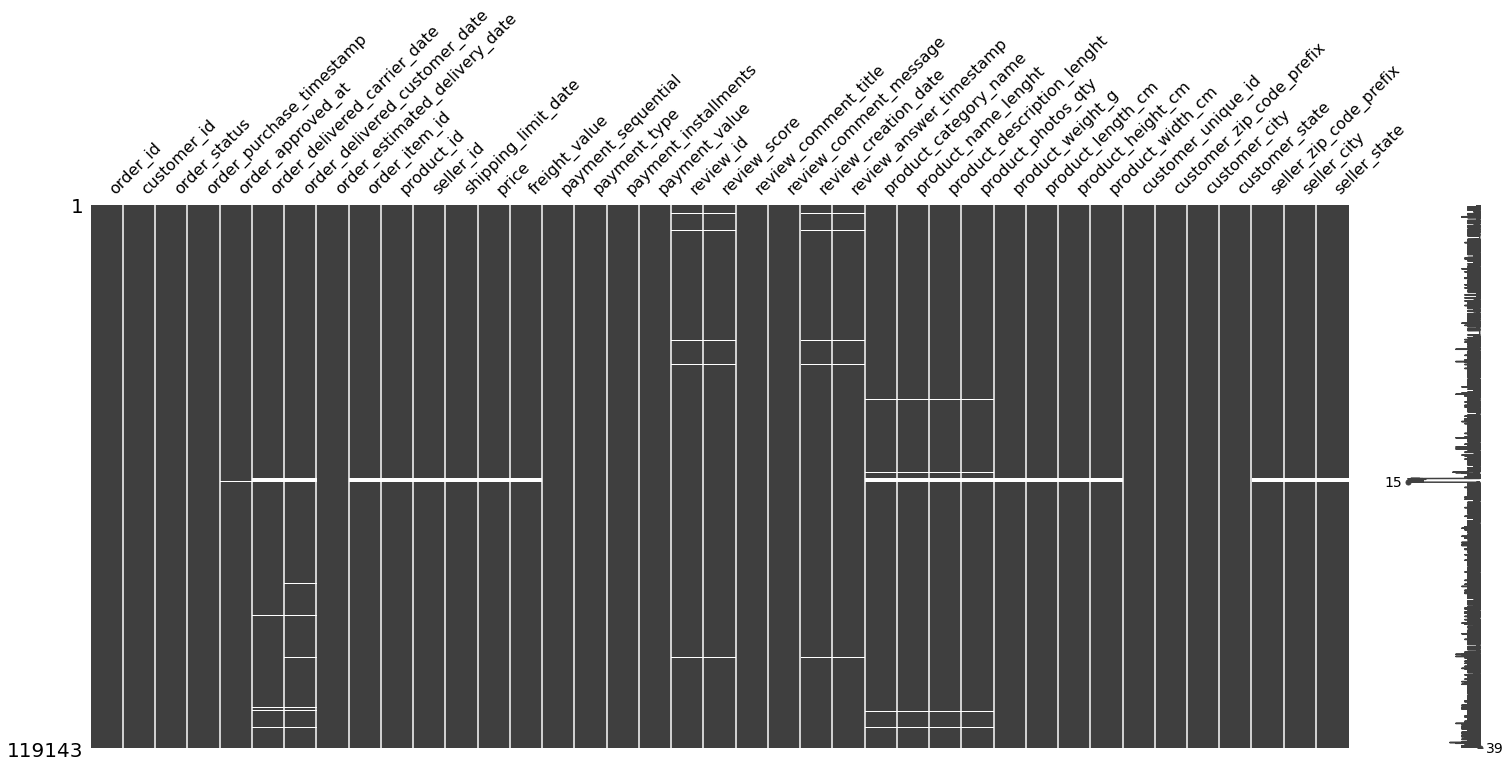

In [26]:
msno.matrix(olist)

In [27]:
before_drop = olist.shape[0]
olist= olist.dropna()
after_drop = olist.shape[0]
print(f'{round(((before_drop-after_drop)/after_drop)*100,2)}% of dataset are nan values ')

5.24% of dataset are nan values 


<AxesSubplot:>

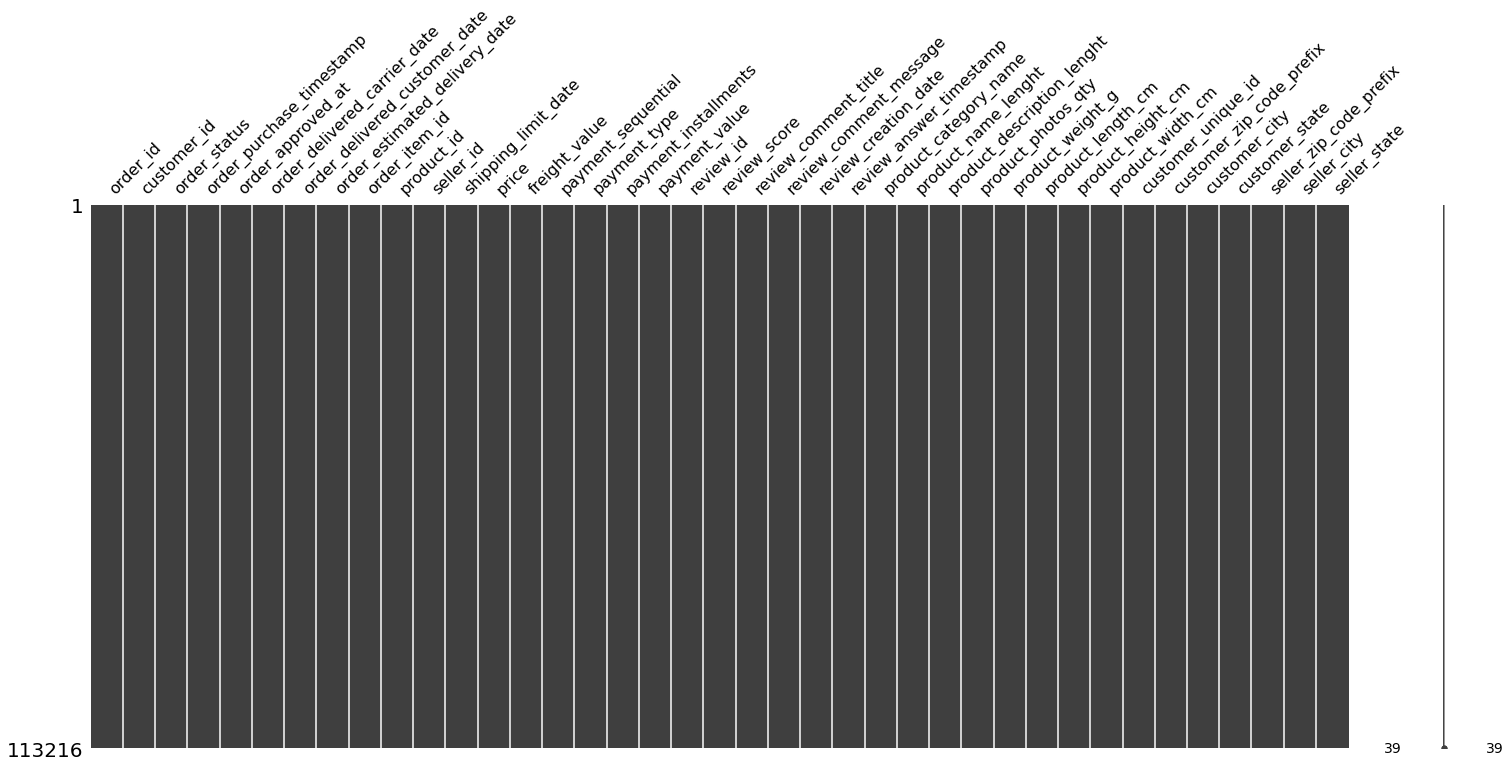

In [28]:
msno.matrix(olist)

In [29]:
olist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113216 entries, 0 to 119142
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113216 non-null  object 
 1   customer_id                    113216 non-null  object 
 2   order_status                   113216 non-null  object 
 3   order_purchase_timestamp       113216 non-null  object 
 4   order_approved_at              113216 non-null  object 
 5   order_delivered_carrier_date   113216 non-null  object 
 6   order_delivered_customer_date  113216 non-null  object 
 7   order_estimated_delivery_date  113216 non-null  object 
 8   order_item_id                  113216 non-null  float64
 9   product_id                     113216 non-null  object 
 10  seller_id                      113216 non-null  object 
 11  shipping_limit_date            113216 non-null  object 
 12  price                         

In [30]:
olist['order_purchase_timestamp'] = pd.to_datetime(olist.order_purchase_timestamp)
olist['order_approved_at'] = pd.to_datetime(olist.order_approved_at)
olist['order_delivered_carrier_date'] = pd.to_datetime(olist.order_delivered_carrier_date)
olist['order_delivered_customer_date'] = pd.to_datetime(olist.order_delivered_customer_date)
olist['order_estimated_delivery_date'] = pd.to_datetime(olist.order_estimated_delivery_date)
olist['shipping_limit_date'] = pd.to_datetime(olist.shipping_limit_date)
olist['review_creation_date'] = pd.to_datetime(olist.review_creation_date)

In [31]:
olist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113216 entries, 0 to 119142
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113216 non-null  object        
 1   customer_id                    113216 non-null  object        
 2   order_status                   113216 non-null  object        
 3   order_purchase_timestamp       113216 non-null  datetime64[ns]
 4   order_approved_at              113216 non-null  datetime64[ns]
 5   order_delivered_carrier_date   113216 non-null  datetime64[ns]
 6   order_delivered_customer_date  113216 non-null  datetime64[ns]
 7   order_estimated_delivery_date  113216 non-null  datetime64[ns]
 8   order_item_id                  113216 non-null  float64       
 9   product_id                     113216 non-null  object        
 10  seller_id                      113216 non-null  object        
 11  

In [32]:
olist.head().T

,0,1,2,3,4
order_id,e481f51cbdc54678b7cc49136f2d6af7,e481f51cbdc54678b7cc49136f2d6af7,e481f51cbdc54678b7cc49136f2d6af7,128e10d95713541c87cd1a2e48201934,0e7e841ddf8f8f2de2bad69267ecfbcf
customer_id,9ef432eb6251297304e76186b10a928d,9ef432eb6251297304e76186b10a928d,9ef432eb6251297304e76186b10a928d,a20e8105f23924cd00833fd87daa0831,26c7ac168e1433912a51b924fbd34d34
order_status,delivered,delivered,delivered,delivered,delivered
order_purchase_timestamp,2017-10-02 10:56:33,2017-10-02 10:56:33,2017-10-02 10:56:33,2017-08-15 18:29:31,2017-08-02 18:24:47
order_approved_at,2017-10-02 11:07:15,2017-10-02 11:07:15,2017-10-02 11:07:15,2017-08-15 20:05:16,2017-08-02 18:43:15
order_delivered_carrier_date,2017-10-04 19:55:00,2017-10-04 19:55:00,2017-10-04 19:55:00,2017-08-17 15:28:33,2017-08-04 17:35:43
order_delivered_customer_date,2017-10-10 21:25:13,2017-10-10 21:25:13,2017-10-10 21:25:13,2017-08-18 14:44:43,2017-08-07 18:30:01
order_estimated_delivery_date,2017-10-18 00:00:00,2017-10-18 00:00:00,2017-10-18 00:00:00,2017-08-28 00:00:00,2017-08-15 00:00:00
order_item_id,1.0,1.0,1.0,1.0,1.0
product_id,87285b34884572647811a353c7ac498a,87285b34884572647811a353c7ac498a,87285b34884572647811a353c7ac498a,87285b34884572647811a353c7ac498a,87285b34884572647811a353c7ac498a


In [33]:
num_attributes = olist.select_dtypes( include=['int64', 'float64'] )
cat_attributes = olist.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )

In [34]:
# Central Tendency - mean, meadina 
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T 
d2 = pd.DataFrame( num_attributes.apply( min ) ).T 
d3 = pd.DataFrame( num_attributes.apply( max ) ).T 
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T 
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T 
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T 

# concatenar
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,order_item_id,1.00,21.00,20.00,1.195052,1.00,0.687471,7.229806,94.231738
1,price,0.85,6735.00,6734.15,119.869740,74.90,181.126616,7.706474,111.434261
2,freight_value,0.00,409.68,409.68,20.002353,16.32,15.710839,5.587382,59.278834
3,payment_sequential,1.00,26.00,25.00,1.090809,1.00,0.686607,15.109333,310.249268
4,payment_installments,0.00,24.00,24.00,2.943515,2.00,2.779125,1.623119,2.546519
5,payment_value,0.00,13664.08,13664.08,171.577925,107.97,264.217510,14.648382,547.206687
6,review_score,1.00,5.00,4.00,4.082365,5.00,1.345999,-1.352310,0.480242
7,product_name_lenght,5.00,76.00,71.00,48.804224,52.00,10.015732,-0.910225,0.157465
8,product_description_lenght,4.00,3992.00,3988.00,784.725710,600.00,650.297467,2.007498,4.921317
9,product_photos_qty,1.00,20.00,19.00,2.206967,1.00,1.718310,1.903515,4.765856


In [35]:
# profile = ProfileReport(olist)
# profile

In [36]:
cat_attributes.apply( lambda x: x.unique().shape[0] )

order_id                   94490
customer_id                94490
order_status                   2
product_id                 31485
seller_id                   2909
payment_type                   4
review_id                  94314
review_comment_title        4350
review_comment_message     33958
review_answer_timestamp    94167
product_category_name         73
customer_unique_id         91484
customer_city               4071
customer_state                27
seller_city                  587
seller_state                  22
dtype: int64

In [45]:
print(olist.shape)
print(olist.drop_duplicates('order_id').shape)

(113216, 39)
(94490, 39)


In [87]:
olist['order_purchase_date'] = olist['order_purchase_timestamp'].dt.date
olist['order_purchase_time'] = olist['order_purchase_timestamp'].dt.time
olist['order_purchase_year'] = olist['order_purchase_timestamp'].dt.year
olist['order_purchase_month'] = olist['order_purchase_timestamp'].dt.month
olist['order_purchase_day'] = olist['order_purchase_timestamp'].dt.day
olist['order_purchase_hour'] = olist['order_purchase_timestamp'].dt.hour
olist['order_purchase_day_of_week'] = olist['order_purchase_timestamp'].dt.dayofweek
olist['order_purchase_year_week'] = olist['order_purchase_timestamp'].dt.strftime( '%Y-%W' )
# olist['order_purchase_time'] = olist['order_purchase_timestamp'].dt.time

<AxesSubplot:xlabel='order_purchase_date', ylabel='price'>

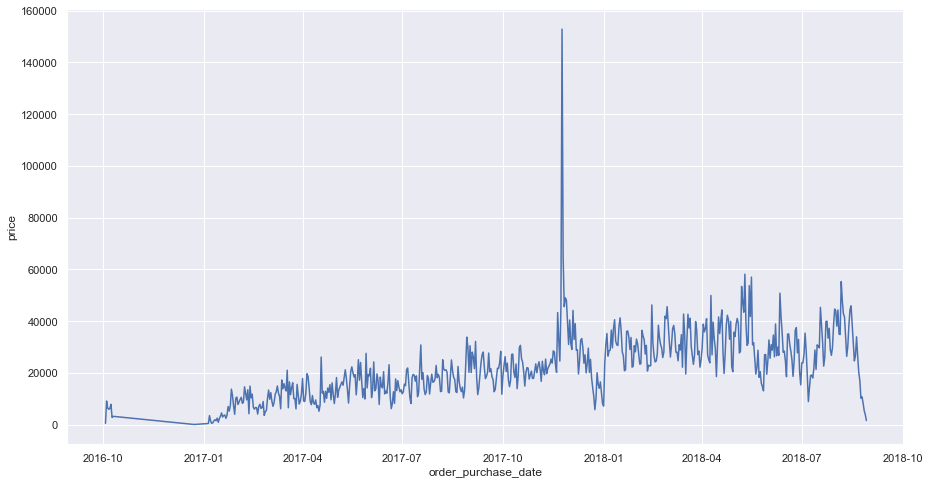

In [70]:
aux = olist[['price','order_purchase_date']].groupby('order_purchase_date').sum().reset_index()

sns.lineplot(x = 'order_purchase_date', y='price', data = aux)

In [48]:
olist[['order_approved_at','price']]

,order_approved_at,price
0,2017-10-02 11:07:15,29.99
1,2017-10-02 11:07:15,29.99
2,2017-10-02 11:07:15,29.99
3,2017-08-15 20:05:16,29.99
4,2017-08-02 18:43:15,29.99
...,...,...
119135,2018-08-10 21:25:22,44.99
119138,2018-07-05 16:17:52,79.00
119140,2018-07-24 11:24:27,399.00
119141,2018-05-22 21:35:40,219.90


# Step 03 - Data Filtering

# Step 04 - Exploratory Analysis

Some hypothesis: 

    - Most purchased items are cheap 
    - The longest the distance traveled by the item, the pricier it is
    - More purchases are made at night
    - Big cities should concentrate higher shipping volume
    - Relatively low use of too many installments
    - Most purchased items are the best rated
    - Most purchased items are the most commented

<AxesSubplot:xlabel='order_purchase_day_of_week', ylabel='price'>

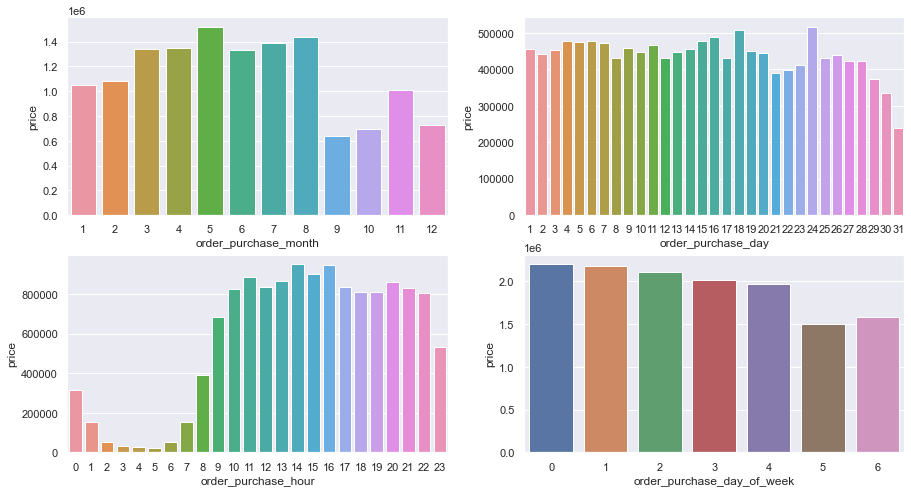

In [90]:
plt.subplot( 2, 2, 1 )
aux = olist[['order_id','order_purchase_month','price']].groupby(['order_id','order_purchase_month']).sum().reset_index().groupby('order_purchase_month').sum().reset_index()
sns.barplot(x= 'order_purchase_month',y='price', data= aux )
plt.subplot( 2, 2, 2 )
aux = olist[['order_id','order_purchase_day','price']].groupby(['order_id','order_purchase_day']).sum().reset_index().groupby('order_purchase_day').sum().reset_index()
sns.barplot(x= 'order_purchase_day',y='price', data= aux )
plt.subplot( 2, 2, 3 )
aux = olist[['order_id','order_purchase_hour','price']].groupby(['order_id','order_purchase_hour']).sum().reset_index().groupby('order_purchase_hour').sum().reset_index()
sns.barplot(x= 'order_purchase_hour',y='price', data= aux )
plt.subplot( 2, 2, 4 )
aux = olist[['order_id','order_purchase_day_of_week','price']].groupby(['order_id','order_purchase_day_of_week']).sum().reset_index().groupby('order_purchase_day_of_week').sum().reset_index()
sns.barplot(x= 'order_purchase_day_of_week',y='price', data= aux )

In [94]:
olist[['order_id','order_purchase_month']].groupby(['order_id','order_purchase_month']).count().reset_index()

,order_id,order_purchase_month
0,00010242fe8c5a6d1ba2dd792cb16214,9
1,00018f77f2f0320c557190d7a144bdd3,4
2,000229ec398224ef6ca0657da4fc703e,1
3,00024acbcdf0a6daa1e931b038114c75,8
4,00042b26cf59d7ce69dfabb4e55b4fd9,2
...,...,...
94485,fffc94f6ce00a00581880bf54a75a037,4
94486,fffcd46ef2263f404302a634eb57f7eb,7
94487,fffce4705a9662cd70adb13d4a31832d,10
94488,fffe18544ffabc95dfada21779c9644f,8


In [ ]:
plt.subplot( 2, 2, 1 )
aux = olist[['order_id','order_purchase_month','price']].groupby(['order_id','order_purchase_month']).count().reset_index().groupby('order_purchase_month').sum().reset_index()
sns.barplot(x= 'order_purchase_month',y='price', data= aux )
plt.subplot( 2, 2, 2 )
aux = olist[['order_id','order_purchase_day','price']].groupby(['order_id','order_purchase_day']).count().reset_index().groupby('order_purchase_day').sum().reset_index()
sns.barplot(x= 'order_purchase_day',y='price', data= aux )
plt.subplot( 2, 2, 3 )
aux = olist[['order_id','order_purchase_hour','price']].groupby(['order_id','order_purchase_hour']).count().reset_index().groupby('order_purchase_hour').sum().reset_index()
sns.barplot(x= 'order_purchase_hour',y='price', data= aux )
plt.subplot( 2, 2, 4 )
aux = olist[['order_id','order_purchase_day_of_week','price']].groupby(['order_id','order_purchase_day_of_week']).count().reset_index().groupby('order_purchase_day_of_week').sum().reset_index()
sns.barplot(x= 'order_purchase_day_of_week',y='price', data= aux )

<AxesSubplot:xlabel='order_purchase_day_of_week', ylabel='price'>

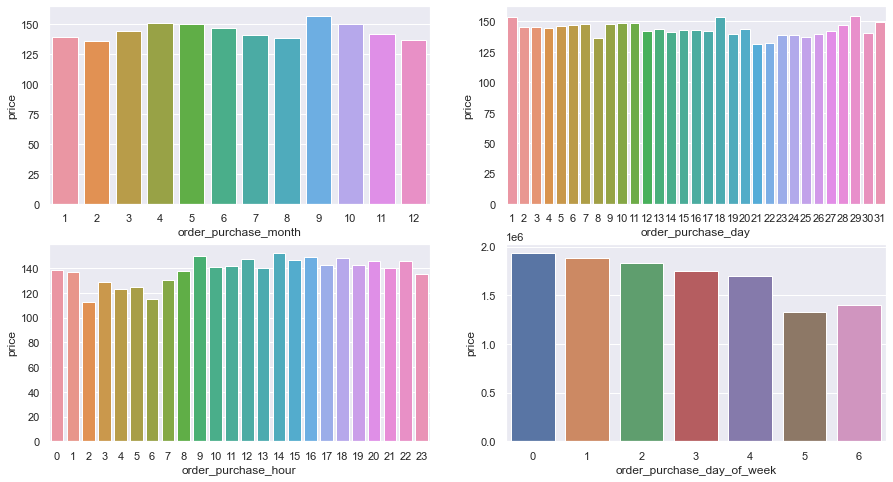

In [91]:
plt.subplot( 2, 2, 1 )
aux = olist[['order_id','order_purchase_month','price']].groupby(['order_id','order_purchase_month']).sum().reset_index().groupby('order_purchase_month').mean().reset_index()
sns.barplot(x= 'order_purchase_month',y='price', data= aux )
plt.subplot( 2, 2, 2 )
aux = olist[['order_id','order_purchase_day','price']].groupby(['order_id','order_purchase_day']).sum().reset_index().groupby('order_purchase_day').mean().reset_index()
sns.barplot(x= 'order_purchase_day',y='price', data= aux )
plt.subplot( 2, 2, 3 )
aux = olist[['order_id','order_purchase_hour','price']].groupby(['order_id','order_purchase_hour']).sum().reset_index().groupby('order_purchase_hour').mean().reset_index()
sns.barplot(x= 'order_purchase_hour',y='price', data= aux )
plt.subplot( 2, 2, 4 )
aux = olist[['order_id','order_purchase_day_of_week','price']].groupby(['order_id','order_purchase_day_of_week']).mean().reset_index().groupby('order_purchase_day_of_week').sum().reset_index()
sns.barplot(x= 'order_purchase_day_of_week',y='price', data= aux )

# Step 05 - Data Preparation

# Step 06 - Feature Selection

# Step 07 - Machine Learning Modeling

# Step 08 - Hyperparameter Fine Tuning

# Step 09 - Translation and interpretation

# Step 10 - Model Deployment

In [ ]:
# 